Ejercicio 3.C
Usando la función plot_metrics muestra las gráficas de las pérdidas por épocas de las siguientes redes neuronales para el DataFrame de las flores:

Nº Neuronas en cada capa
2,4,2,1
4,8,4,1
8,16,8,1
4,8,4,2,1
8,16,8,4,1
16,32,16,8,1
32,64,32,8,1
64,128,64,8,1
8,16,32,64,32,16,8,1
Pero para cada tipo de red ,deberás entrenarla 3 veces distintas y obtener resultado distintos con:

Los datos originales
Los datos normalizados
Los datos estandarizados
Además:

Deberás mostrar los 9 subplots en la disposición de 9×3 (9 filas y 3 columnas)
En la primera columna se mostrarán el resultado de entrenar la red con los datos originales
En la segunda columna se mostrarán el resultado de entrenar la red con los datos normalizados
En la tercera columna se mostrarán el resultado de entrenar la red con los datos estandarizados
El título de cada subplot:
En la primera columna se mostrarán nº de neuronas por capa y el texto “originales”
En la segunda columna se mostrarán nº de neuronas por capa y el texto “normalizados”
En la tercera columna se mostrarán nº de neuronas por capa y el texto “estandarizados”
¿Hay diferencias al usar los datos normalizados o estandarizado? ¿Cual es mejor y peor? ¿Las ventajas son las mismas independientemente de la red?

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_iris
from matplotlib.colors import LightSource
import random
import tabulate

sample_data_flowers = load_iris()
columns = sample_data_flowers.feature_names
# print(dir(sample_data_flowers))
# print(sample_data_flowers.data)

data_frame_flowers: pd.DataFrame = pd.DataFrame(sample_data_flowers.data, columns=columns)
data_frame_flowers['flower type'] = sample_data_flowers.target
data_frame_flowers.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
def compile_fit(layers_epochs, model_x, model_y):
    tf.keras.utils.set_random_seed(5)

    layers = layers_epochs[0]
    epochs = layers_epochs[1]

    model = Sequential()

    number_of_columns = len(model_x[0])

    for idx, layer in enumerate(layers):
        if idx == 0:
            model.add(Dense(layer, activation='relu', input_dim=number_of_columns))
        elif idx == (len(layers) - 1):
            model.add(Dense(layer, activation='sigmoid'))
        else:
            model.add(Dense(layer, activation='relu'))

    model.compile(loss='mean_squared_error')

    timestamp_before = time.time_ns()
    history = model.fit(model_x, model_y, epochs=epochs, verbose=False)
    timestamp_after = time.time_ns()

    return {
        "model": model,
        "elapsed_time": (timestamp_after - timestamp_before) / 1_000_000_000,
        "history": history
    }

In [3]:
neuronal_nets = [
    [2, 4, 2, 1],
    [4, 8, 4, 1],
    [8, 16, 8, 1],
    [4, 8, 4, 2, 1],
    [8, 16, 8, 4, 1],
    [16, 32, 16, 8, 1],
    [32, 64, 32, 8, 1],
    [64, 128, 64, 8, 1],
    [8, 16, 32, 64, 32, 16, 8, 1]
]

In [4]:
my_x = data_frame_flowers.loc[:, data_frame_flowers.columns != 'flower type']
my_y = data_frame_flowers['flower type']

In [5]:
normalized_x = (my_x - my_x.min()) / (my_x.max() - my_x.min())
standarized_x = (my_x - my_x.mean()) / my_x.std()

In [6]:
global_metrics = pd.DataFrame([], columns=['Neuronal net', 'Epoch', 'Loss Raw', 'Loss Normalized', 'Loss Standarized'])

In [7]:
for net in neuronal_nets:
    model_metrics = compile_fit([net, 40], my_x.to_numpy(), my_y.to_numpy())
    model_history = model_metrics["history"]

    normalized_model_metrics = compile_fit([net, 40], normalized_x.to_numpy(), my_y.to_numpy())
    normalized_model_history = normalized_model_metrics["history"]

    standarized_model_metrics = compile_fit([net, 40], standarized_x.to_numpy(), my_y.to_numpy())
    standarized_model_history = standarized_model_metrics["history"]

    for idx, loss in enumerate(model_history.history["loss"]):
        global_metrics.loc[len(global_metrics)] = [(','.join(map(str, net))), idx + 1, loss,
                                                   normalized_model_history.history["loss"][idx],
                                                   standarized_model_history.history["loss"][idx]]

print(global_metrics)

             Neuronal net  Epoch  Loss Raw  Loss Normalized  Loss Standarized
0                 2,4,2,1      1  0.915512         0.915512          0.915512
1                 2,4,2,1      2  0.913396         0.913396          0.913396
2                 2,4,2,1      3  0.911883         0.911883          0.911883
3                 2,4,2,1      4  0.910491         0.910491          0.910491
4                 2,4,2,1      5  0.909237         0.909237          0.909237
..                    ...    ...       ...              ...               ...
355  8,16,32,64,32,16,8,1     36  0.333347         0.333434          0.333375
356  8,16,32,64,32,16,8,1     37  0.333346         0.333419          0.333369
357  8,16,32,64,32,16,8,1     38  0.333344         0.333403          0.333364
358  8,16,32,64,32,16,8,1     39  0.333344         0.333396          0.333360
359  8,16,32,64,32,16,8,1     40  0.333342         0.333385          0.333357

[360 rows x 5 columns]


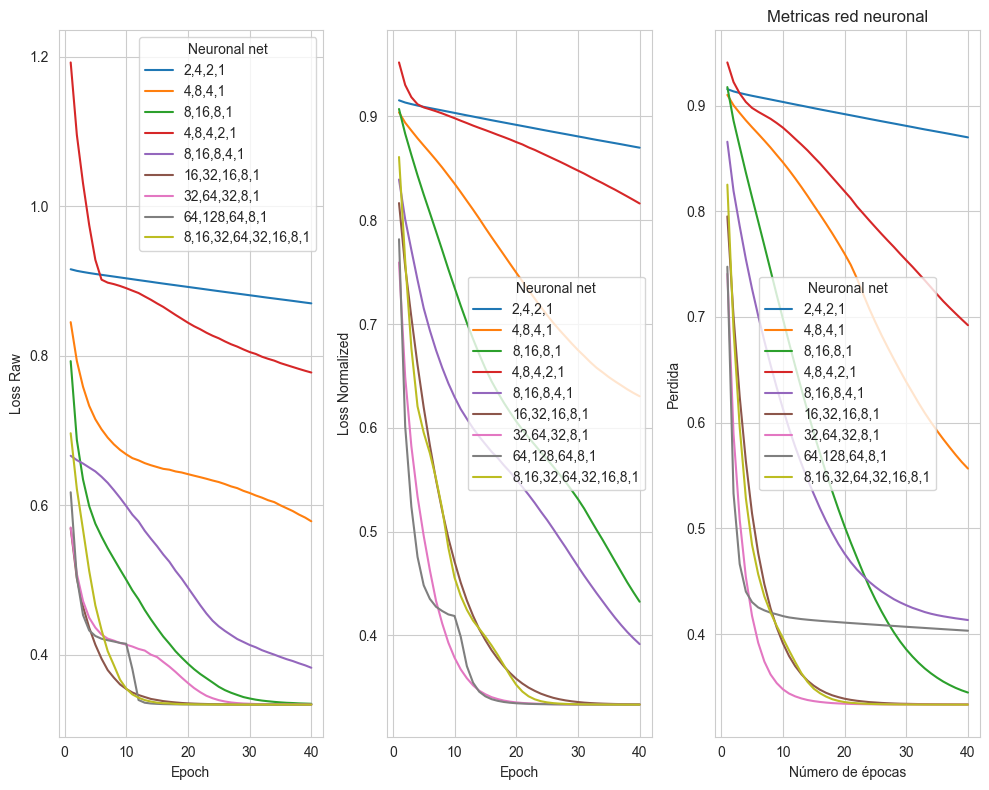

In [14]:
figure = plt.figure(figsize=(10, 8))
axes_1 = figure.add_subplot(1, 3, 1)
axes_2 = figure.add_subplot(1, 3, 2)
axes_3 = figure.add_subplot(1, 3, 3)

sns.lineplot(x="Epoch", y="Loss Raw", hue="Neuronal net", data=global_metrics, ax=axes_1)
sns.lineplot(x="Epoch", y="Loss Normalized", hue="Neuronal net", data=global_metrics, ax=axes_2)
sns.lineplot(x="Epoch", y="Loss Standarized", hue="Neuronal net", data=global_metrics, ax=axes_3)
plt.title('Metricas red neuronal')
plt.xlabel('Número de épocas')
plt.ylabel('Perdida')
plt.tight_layout()
plt.show()